# March Madness 2016 Kaggle data

In [1]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_dir = 'C:/Users/kesj/data/kaggle/march-machine-learning-mania-2016-v2/'

In [3]:
os.chdir(data_dir)
from glob import glob

## What to predict

### Stage 1 - You should submit predicted probabilities for every possible matchup in the past 4 NCAA tournaments (2012-2015).

### Stage 2 - You should submit predicted probabilities for every possible matchup before the 2016 tournament begins.

Refer to the Timeline page for specific dates. In both stages, the sample submission will tell you which games to predict.

## File descriptions

Below we describe the format and fields of the "essential" data files. Optional files may be added to the data while the competition is running. You can assume that we will provide the essential files for the current season. You should not assume that we will provide optional files for the current season.

### Teams

This file identifies the different college teams present in the dataset. Each team has a 4 digit id number.

### Seasons

This file identifies the different seasons included in the historical data, along with certain season-level properties.

* "season" - indicates the year in which the tournament was played
* "dayzero" - tells you the date corresponding to daynum=0 during that season. All game dates have been aligned upon a common scale so that the championship game of the final tournament is on daynum=154. Working backward, the national semifinals are always on daynum=152, the "play-in" games are on days 134/135, Selection Sunday is on day 132, and so on. All game data includes the day number in order to make it easier to perform date calculations. If you really want to know the exact date a game was played on, you can combine the game's "daynum" with the season's "dayzero". For instance, since day zero during the 2011-2012 season was 10/31/2011, if we know that the earliest regular season games that year were played on daynum=7, they were therefore played on 11/07/2011.
* "regionW/X/Y/Z" - by convention, the four regions in the final tournament are always named W, X, Y, and Z. Whichever region's name comes first alphabetically, that region will be Region W. And whichever Region plays against Region W in the national semifinals, that will be Region X. For the other two regions, whichever region's name comes first alphabetically, that region will be Region Y, and the other will be Region Z. This allows us to identify the regions and brackets in a standardized way in other files. For instance, during the 2012 tournament, the four regions were East, Midwest, South, and West. Being the first alphabetically, East becomes W. Since the East regional champion (Ohio State) played against the Midwest regional champion (Kansas) in the national semifinals, that makes Midwest be region X. For the other two (South and West), since South comes first alphabetically, that makes South Y and therefore West is Z. So for this season, the W/X/Y/Z are East,Midwest,South,West.

### RegularSeasonCompactResults

This file identifies the game-by-game results for 31 seasons of historical data, from 1985 to 2015. Each year, it includes all games played from daynum 0 through 132 (which by definition is "Selection Sunday," the day that tournament pairings are announced). Each row in the file represents a single game played.

* "season" - this is the year of the associated entry in seasons.csv (the year in which the final tournament occurs)
* "daynum" - this integer always ranges from 0 to 132, and tells you what day the game was played on. It represents an offset from the "dayzero" date in the "seasons.csv" file. For example, the first game in the file was daynum=20. Combined with the fact from the "season.csv" file that day zero was 10/29/1984, that means the first game was played 20 days later, or 11/18/1984. There are no teams that ever played more than one game on a given date, so you can use this fact if you need a unique key. In order to accomplish this uniqueness, we had to adjust one game's date. In March 2008, the SEC postseason tournament had to reschedule one game (Georgia-Kentucky) to a subsequent day, so Georgia had to actually play two games on the same day. In order to enforce this uniqueness, we moved the game date for the Georgia-Kentucky game back to its original date.
* "wteam" - this identifies the id number of the team that won the game, as listed in the "teams.csv" file. No matter whether the game was won by the home team or visiting team, "wteam" always identifies the winning team.
* "wscore" - this identifies the number of points scored by the winning team.
* "lteam" - this identifies the id number of the team that lost the game.
* "lscore" - this identifies the number of points scored by the losing team.
* "numot" - this indicates the number of overtime periods in the game, an integer 0 or higher.
* "wloc" - this identifies the "location" of the winning team. If the winning team was the home team, this value will be "H". If the winning team was the visiting team, this value will be "A". If it was played on a neutral court, then this value will be "N". Sometimes it is unclear whether the site should be considered neutral, since it is near one team's home court, or even on their court during a tournament, but for this determination we have simply used the Kenneth Massey data in its current state, where the "@" sign is either listed with the winning team, the losing team, or neither team.

### RegularSeasonDetailedResults

This file is a more detailed set of game results, covering seasons 2003-2015. This includes team-level total statistics for each game (total field goals attempted, offensive rebounds, etc.) The column names should be self-explanatory to basketball fans (as above, "w" or "l" refers to the winning or losing team):

* wfgm - field goals made
* wfga - field goals attempted
* wfgm3 - three pointers made
* wfga3 - three pointers attempted
* wftm - free throws made
* wfta - free throws attempted
* wor - offensive rebounds
* wdr - defensive rebounds
* wast - assists
* wto - turnovers
* wstl - steals
* wblk - blocks
* wpf - personal fouls

### TourneyCompactResults

This file identifies the game-by-game NCAA tournament results for all seasons of historical data. The data is formatted exactly like the regular_season_compact_results.csv data. Note that these games also include the play-in games (which always occurred on day 134/135) for those years that had play-in games.

### TourneyDetailedResults

This file contains the more detailed results for tournament games from 2003 onward.

### TourneySeeds

This file identifies the seeds for all teams in each NCAA tournament, for all seasons of historical data. Thus, there are between 64-68 rows for each year, depending on the bracket structure.

* "season" - the year
* "seed" - this is a 3/4-character identifier of the seed, where the first character is either W, X, Y, or Z (identifying the region the team was in) and the next two digits (either 01, 02, ..., 15, or 16) tells you the seed within the region. For play-in teams, there is a fourth character (a or b) to further distinguish the seeds, since teams that face each other in the play-in games will have the same first three characters. For example, the first record in the file is seed W01, which means we are looking at the #1 seed in the W region (which we can see from the "seasons.csv" file was the East region). This seed is also referenced in the "tourney_slots.csv" file that tells us which bracket slots face which other bracket slots in which rounds.
* "team" - this identifies the id number of the team, as specified in the teams.csv file

### TourneySlots

This file identifies the mechanism by which teams are paired against each other, depending upon their seeds. Because of the existence of play-in games for particular seed numbers, the pairings have small differences from year to year. If there were N teams in the tournament during a particular year, there were N-1 teams eliminated (leaving one champion) and therefore N-1 games played, as well as N-1 slots in the tournament bracket, and thus there will be N-1 records in this file for that season.

* "season" - the year
* "slot" - this uniquely identifies one of the tournament games. For play-in games, it is a three-character string identifying the seed fulfilled by the winning team, such as W16 or Z13. For regular tournament games, it is a four-character string, where the first two characters tell you which round the game is (R1, R2, R3, R4, R5, or R6) and the second two characters tell you the expected seed of the favored team. Thus the first row is R1W1, identifying the Round 1 game played in the W bracket, where the favored team is the 1 seed. As a further example, the R2W1 slot indicates the Round 2 game that would have the 1 seed from the W bracket, assuming that all favored teams have won up to that point. The slot names are different for the final two rounds, where R5WX identifies the national semifinal game between the winners of regions W and X, and R5YZ identifies the national semifinal game between the winners of regions Y and Z, and R6CH identifies the championship game. The "slot" value is used in other columns in order to represent the advancement and pairings of winners of previous games.
* "strongseed" - this indicates the expected stronger-seeded team that plays in this game. For Round 1 games, a team seed is identified in this column (as listed in the "seed" column in the tourney_seeds.csv file), whereas for subsequent games, a slot is identified in this column. In the first record of this file (slot R1W1), we see that seed W01 is the "strongseed", which during the 1985 tournament would have been Georgetown. Whereas for games from Round 2 or later, rather than a team seed, we will see a "slot" referenced in this column. So in the 33rd record of this file (slot R2W1), it tells us that the winners of slots R1W1 and R1W8 will face each other in Round 2. Of course, in the last few games of the tournament - the national semifinals and finals - it's not really meaningful to talk about a "strong seed" or "weak seed", but those games are represented in the same format for the sake of uniformity.
* "weakseed" - this indicates the expected weaker-seeded team that plays in this game, assuming all favored teams have won so far. For Round 1 games, a team seed is identified in this column (as listed in the "seed" column in the tourney_seeds.csv file), whereas for subsequent games, a slot is identified in this column.

## Start to parse the files

In [5]:
seasons = pd.read_csv('Seasons.csv')

In [6]:
seasons

,Season,Dayzero,Regionw,Regionx,Regiony,Regionz
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast
5,1990,10/30/1989,East,Midwest,Southeast,West
6,1991,10/29/1990,East,Southeast,Midwest,West
7,1992,11/4/1991,East,West,Midwest,Southeast
8,1993,11/2/1992,East,Midwest,Southeast,West
9,1994,11/1/1993,East,Southeast,Midwest,West


### Regular Season Compact results



In [7]:
reg_season_comp= pd.read_csv('RegularSeasonCompactResults.csv')
reg_season_comp.shape

(145289, 8)

In [8]:
reg_season_comp.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


### RegularSeasonDetailedResults

This file is a more detailed set of game results, covering seasons 2003-2015. This includes team-level total statistics for each game (total field goals attempted, offensive rebounds, etc.) The column names should be self-explanatory to basketball fans (as above, "w" or "l" refers to the winning or losing team):

* wfgm - field goals made
* wfga - field goals attempted
* wfgm3 - three pointers made
* wfga3 - three pointers attempted
* wftm - free throws made
* wfta - free throws attempted
* wor - offensive rebounds
* wdr - defensive rebounds
* wast - assists
* wto - turnovers
* wstl - steals
* wblk - blocks
* wpf - personal fouls

In [8]:
reg_season_dtl = pd.read_csv('RegularSeasonDetailedResults.csv')

### Tourney Compact

In [9]:
tourney_comp = pd.read_csv('TourneyCompactResults.csv')

In [10]:
tourney_comp.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


### TourneySeeds

This file identifies the seeds for all teams in each NCAA tournament, for all seasons of historical data. Thus, there are between 64-68 rows for each year, depending on the bracket structure.

* "season" - the year
* "seed" - this is a 3/4-character identifier of the seed, where the first character is either W, X, Y, or Z (identifying the region the team was in) and the next two digits (either 01, 02, ..., 15, or 16) tells you the seed within the region. For play-in teams, there is a fourth character (a or b) to further distinguish the seeds, since teams that face each other in the play-in games will have the same first three characters. For example, the first record in the file is seed W01, which means we are looking at the #1 seed in the W region (which we can see from the "seasons.csv" file was the East region). This seed is also referenced in the "tourney_slots.csv" file that tells us which bracket slots face which other bracket slots in which rounds.
* "team" - this identifies the id number of the team, as specified in the teams.csv file

### TourneySlots

This file identifies the mechanism by which teams are paired against each other, depending upon their seeds. Because of the existence of play-in games for particular seed numbers, the pairings have small differences from year to year. If there were N teams in the tournament during a particular year, there were N-1 teams eliminated (leaving one champion) and therefore N-1 games played, as well as N-1 slots in the tournament bracket, and thus there will be N-1 records in this file for that season.

* "season" - the year
* "slot" - this uniquely identifies one of the tournament games. For play-in games, it is a three-character string identifying the seed fulfilled by the winning team, such as W16 or Z13. For regular tournament games, it is a four-character string, where the first two characters tell you which round the game is (R1, R2, R3, R4, R5, or R6) and the second two characters tell you the expected seed of the favored team. Thus the first row is R1W1, identifying the Round 1 game played in the W bracket, where the favored team is the 1 seed. As a further example, the R2W1 slot indicates the Round 2 game that would have the 1 seed from the W bracket, assuming that all favored teams have won up to that point. The slot names are different for the final two rounds, where R5WX identifies the national semifinal game between the winners of regions W and X, and R5YZ identifies the national semifinal game between the winners of regions Y and Z, and R6CH identifies the championship game. The "slot" value is used in other columns in order to represent the advancement and pairings of winners of previous games.
* "strongseed" - this indicates the expected stronger-seeded team that plays in this game. For Round 1 games, a team seed is identified in this column (as listed in the "seed" column in the tourney_seeds.csv file), whereas for subsequent games, a slot is identified in this column. In the first record of this file (slot R1W1), we see that seed W01 is the "strongseed", which during the 1985 tournament would have been Georgetown. Whereas for games from Round 2 or later, rather than a team seed, we will see a "slot" referenced in this column. So in the 33rd record of this file (slot R2W1), it tells us that the winners of slots R1W1 and R1W8 will face each other in Round 2. Of course, in the last few games of the tournament - the national semifinals and finals - it's not really meaningful to talk about a "strong seed" or "weak seed", but those games are represented in the same format for the sake of uniformity.
* "weakseed" - this indicates the expected weaker-seeded team that plays in this game, assuming all favored teams have won so far. For Round 1 games, a team seed is identified in this column (as listed in the "seed" column in the tourney_seeds.csv file), whereas for subsequent games, a slot is identified in this column.

## Initial objective
* identify if there is any relationship between the regular season records and tourney success

### Teams file

In [11]:
teams = pd.read_csv('Teams.csv')
teams.shape

(364, 2)

In [14]:
#teams[teams['Team_Name'][:4] == 'Mich' ].head()
#[team_name for team_name in teams.Team_Name.values.tolist() if team_name.startswith('Michigan')]

['Michigan', 'Michigan St']

## Set up some functions to calculate team attributes for a given season

In [ ]:
# get 2015 season

In [15]:
rs2015 = reg_season_comp[reg_season_comp['Season']==2015].copy()
rs2015.shape

(5354, 8)

In [18]:
wteamids = set(rs2015.Wteam.values.tolist())
lteamids = set(rs2015.Wteam.values.tolist())
teamids = list(wteamids.union(lteamids))
len(teamids)

349

In [19]:
len(teams)

364

In [102]:
t2015 = teams[teams.Team_Id.isin(teamids)]
len(t2015)

349

In [29]:
reg_season_comp.Wloc.value_counts()

H    86471
A    44229
N    14589
Name: Wloc, dtype: int64

In [30]:
reg_season_comp.Wloc.isnull().sum()

0

In [104]:
my_tid=1458
print(teams[teams.Team_Id==my_tid])
tmpW = reg_season_comp[(reg_season_comp['Season']==2015) & (reg_season_comp['Wteam']==my_tid)]
tmpL = reg_season_comp[(reg_season_comp['Season']==2015) & (reg_season_comp['Lteam']==my_tid)]
print (len(tmpW), len(tmpL))

     Team_Id  Team_Name
357     1458  Wisconsin
31 3


In [45]:
tdict = tmpL.Wloc.value_counts().to_dict()
tdict.items()
    

dict_items([('N', 1), ('A', 3), ('H', 12)])

In [48]:
adj = 0
sm = {'N':1,'A':0.6,'H':1.4}
for k,v in tdict.items():
    adj+=v*sm[k]
print (adj)

19.6


In [64]:
my_team = 1324
my_season= 2016
print (teams[teams.Team_Id==my_team])
#nwins= reg_season_comp[reg_season_comp['Season']==my_season]['Wteam'==my_team].sum()
#nloss = reg_season_comp[reg_season_comp['Season']==my_season]['Lteam'==my_team].sum()
#print(nwins, nloss)
nwins= len(reg_season_comp[(reg_season_comp['Season']==my_season) & (reg_season_comp['Wteam']==my_team)])#.sum()
nloss = len(reg_season_comp[(reg_season_comp['Season']==my_season) & (reg_season_comp['Lteam']==my_team)])
print(nwins,nloss)

     Team_Id Team_Name
223     1324   Oakland
21 11


In [80]:
def calc_adjusted_win_losses(locations,my_class='win'):
    
    if my_class == 'win':
        multiplier = {'N':1,'A':1.4,'H':0.6}
    else:
        multiplier = {'N':1,'A':0.6,'H':1.4}
        
    adjust_count = 0
    for k,v in locations.items():
        adjust_count += v*multiplier[k]

    return adjust_count
    
def calc_win_losses(summarydf,team_id,my_season,verbose=False):
    wins = summarydf[(summarydf['Season']==my_season) & (summarydf['Wteam']==team_id)]
    loss = summarydf[(summarydf['Season']==my_season) & (summarydf['Lteam']==team_id)]
    nwins = len(wins)
    nloss = len(loss)
    # also want to count adj wins 
    # if home win: 0.6, if away win: 1.4, if neutral 1
    # if home loss: 1.4 if away loss: 0.6, if neutral 1
    win_loc = wins.Wloc.value_counts().to_dict()
    loss_loc = loss.Wloc.value_counts().to_dict()
    adj_wins = calc_adjusted_win_losses(win_loc)
    adj_loss = calc_adjusted_win_losses(loss_loc,'loss')
    if verbose:
        print("{0}-{1} adjusted to {2}-{3}".format(nwins,nloss,adj_wins,adj_loss))
    #print("adjusted")
    #print("{0}-{1}".format(adj_wins,adj_loss))
    return nwins,nloss,adj_wins,adj_loss

In [105]:
calc_win_losses(reg_season_comp,1458,2015)

(31, 3, 29.0, 3.3999999999999999)

In [106]:
tallies = []
for tid in t2015.Team_Id.tolist():#[:10]:
    #print(tid)
    w,l,aw,al = calc_win_losses(reg_season_comp,tid,2015) 
    new_row = [tid,w,l,aw,al]
    tallies.append(new_row)
#tallies

In [107]:
len(t2015),len(tallies)

(349, 349)

In [110]:
tally_df = pd.DataFrame(tallies,columns =['Team_Id','W','L','aW','aL'])

In [117]:
#t2015 = pd.concat([t2015,pd.DataFrame(tallies,columns=['W','L','aW','aL'])],axis=1)
t2015 = t2015.merge(tally_df,on='Team_Id')

In [118]:
t2015.shape

(349, 6)

## now calculate the win percentage and adjusted win percentage

In [119]:
t2015['WP'] = t2015[['W','L']].apply(lambda x: x[0]/(x[0]+x[1]),axis=1)
t2015['aWP']= t2015[['aW','aL']].apply(lambda x: x[0]/(x[0]+x[1]),axis=1)

In [120]:
t2015.sort_values(by='WP',ascending=False)

,Team_Id,Team_Name,W,L,aW,aL,WP,aWP
137,1246,Kentucky,34,0,30.4,0.0,1.000000,1.000000
323,1437,Villanova,32,2,29.6,2.8,0.941176,0.913580
104,1211,Gonzaga,31,2,29.4,2.0,0.939394,0.936306
10,1112,Arizona,31,3,27.4,4.2,0.911765,0.867089
342,1458,Wisconsin,31,3,29.0,3.4,0.911765,0.895062
209,1320,Northern Iowa,30,3,27.2,4.2,0.909091,0.866242
324,1438,Virginia,29,3,27.4,3.0,0.906250,0.901316
74,1181,Duke,29,4,26.6,4.4,0.878788,0.858065
339,1455,Wichita St,27,4,25.4,4.8,0.870968,0.841060
259,1372,SF Austin,26,4,25.2,4.8,0.866667,0.840000


## look at distribution of WP & aWP

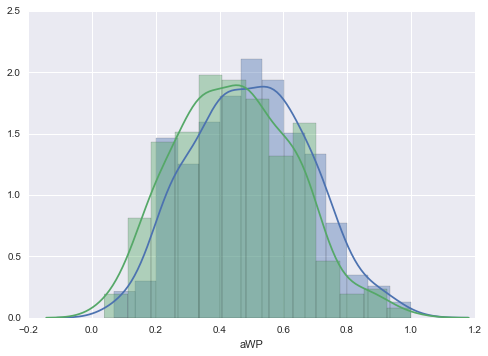

In [128]:
sns.distplot(t2015.WP,label='WP')
sns.distplot(t2015.aWP,label='aWP')

## load in the corresponding tournament info

In [123]:
tourneyResults2015 = tourney_comp[tourney_comp['Season']==2015].copy()
# for each of these 67 games plot the WP for winners & loosers

In [164]:
def get_pct(x,rseason_teams,tfeature='WP'):
    tid = x
    #looser = x[1]
    wp = rseason_teams[rseason_teams['Team_Id']==tid][tfeature].values[0]
    #['WP','aWP']].values.ravel()
    #lp,alp =rseason_teams[rseason_teams['Team_Id']==looser][['WP','aWP']].values.ravel()
    
    return wp

In [165]:
t2015[t2015.Team_Id==1214][['WP','aWP']].values.ravel()

array([ 0.48484848,  0.44067797])

In [166]:
get_pct(1214,t2015)

0.48484848484848486

In [167]:
tourneyResults2015.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
1916,2015,134,1214,74,1264,64,N,0
1917,2015,134,1279,94,1140,90,N,0
1918,2015,135,1173,56,1129,55,N,0
1919,2015,135,1352,81,1316,77,N,0
1920,2015,136,1112,93,1411,72,N,0


In [169]:
tourneyResults2015['wteamWP'] = tourneyResults2015['Wteam'].apply(lambda x: get_pct(x,t2015))#.head()
tourneyResults2015['lteamWP'] = tourneyResults2015['Lteam'].apply(lambda x: get_pct(x,t2015))#.head()

In [174]:
tourneyResults2015['wteam_aWP'] = tourneyResults2015['Wteam'].apply(lambda x: get_pct(x,t2015,'aWP'))#.head()
tourneyResults2015['lteam_aWP'] = tourneyResults2015['Lteam'].apply(lambda x: get_pct(x,t2015,'aWP'))#.head()

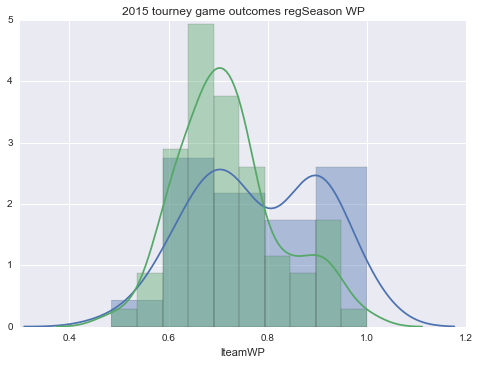

In [173]:
sns.distplot(tourneyResults2015.wteamWP)
sns.distplot(tourneyResults2015.lteamWP)
plt.title('2015 tourney game outcomes regSeason WP')

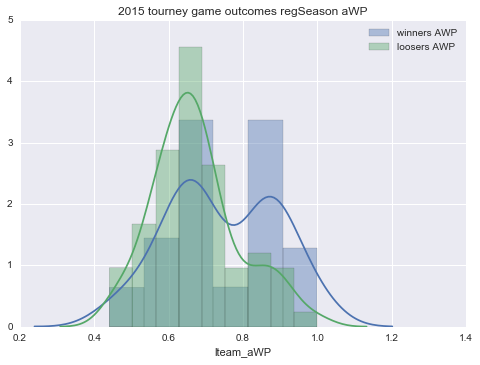

In [175]:
sns.distplot(tourneyResults2015.wteam_aWP,label='winners AWP')
sns.distplot(tourneyResults2015.lteam_aWP,label='loosers AWP')
plt.title('2015 tourney game outcomes regSeason aWP')
plt.legend()

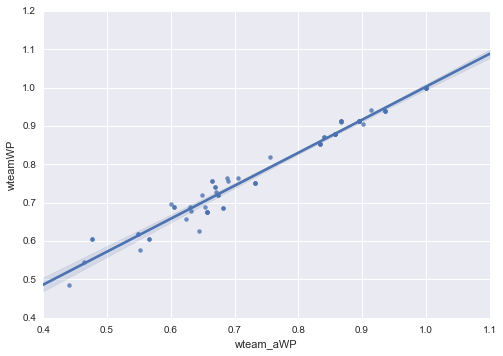

In [178]:
sns.regplot(x='wteam_aWP',y='wteamWP',data=tourneyResults2015)

In [158]:
tR.values[0]

(0.48484848484848486, 0.44067796610169491, 0.59375, 0.52409638554216864)

* RPI = $0.25*WP + 0.5*OWP+ 0.25*OOWP$
* OWP = opponent's winning percentage (omit games against you)
* OOWP (Opponents’ Opponents’ Winning Percentage) is the average OWP of all your opponents. OWP is exactly the number computed in the previous step.

## need to calculate OWP


In [179]:
t2015.head()

,Team_Id,Team_Name,W,L,aW,aL,WP,aWP
0,1101,Abilene Chr,7,21,5.8,24.2,0.250000,0.193333
1,1102,Air Force,12,17,8.8,19.4,0.413793,0.312057
2,1103,Akron,20,14,15.2,16.4,0.588235,0.481013
3,1104,Alabama,17,14,13.8,14.8,0.548387,0.482517
4,1105,Alabama A&M,8,20,8.8,22.0,0.285714,0.285714


In [185]:
wlist, llist = get_list_of_opponents(rs2015,1104)

[1406, 1441, 1379, 1113, 1378, 1399, 1111, 1417, 1316, 1401, 1397, 1120, 1281, 1280, 1120, 1376, 1401] [1235, 1462, 1455, 1376, 1246, 1116, 1196, 1246, 1261, 1435, 1208, 1435, 1279, 1196]


In [189]:
for teamid in wlist:
    print(teamid,t2015[t2015.Team_Id==teamid][['W','L','WP']])
    w = t2015[t2015.Team_Id==teamid].W.values[0]
    l = t2015[t2015.Team_Id==teamid].L.values[0]-1 # because in wlist
    print("OWP = {0}".format(calc_win_pct(w,l)))
    

1406       W   L        WP
293  11  20  0.354839
OWP = 0.36666666666666664
1441       W   L        WP
327  13  17  0.433333
OWP = 0.4482758620689655
1379      W   L        WP
266  7  20  0.259259
OWP = 0.2692307692307692
1113      W   L       WP
11  17  15  0.53125
OWP = 0.5483870967741935
1378      W   L        WP
265  8  23  0.258065
OWP = 0.26666666666666666
1399       W   L        WP
286  10  18  0.357143
OWP = 0.37037037037037035
1111     W   L        WP
9  12  17  0.413793
OWP = 0.42857142857142855
1417       W   L        WP
304  20  13  0.606061
OWP = 0.625
1316       W   L        WP
205  20  11  0.645161
OWP = 0.6666666666666666
1401       W   L        WP
288  20  11  0.645161
OWP = 0.6666666666666666
1397       W   L   WP
284  16  16  0.5
OWP = 0.5161290322580645
1120      W   L        WP
17  14  20  0.411765
OWP = 0.42424242424242425
1281      W   L        WP
172  8  23  0.258065
OWP = 0.26666666666666666
1280       W   L        WP
171  12  19  0.387097
OWP = 0.4
1120      W 

In [182]:
def calc_win_pct(w,l):
    wpct = w/(w+l)
    return wpct

In [193]:
def get_list_of_opponents(reg_season_df,team_id,verbose=False):
    loosing_opponents=reg_season_df[reg_season_df['Wteam']==team_id].Lteam.tolist()
    winning_opponents = reg_season_df[reg_season_df['Lteam']==team_id].Wteam.tolist()
    if verbose:
        print(loosing_opponents,winning_opponents)
    return(loosing_opponents,winning_opponents)


In [214]:
def calc_owin_pct(reg_season,teams,team_id,season_id=2015):
    lopponents,wopponents = get_list_of_opponents(reg_season[reg_season.Season==season_id],team_id)
    owins = []
    # loop through those who you beat
    for teamid in lopponents:
        #print(teamid,t2015[t2015.Team_Id==teamid][['W','L','WP']])
        try:
            w = teams[teams.Team_Id==teamid].W.values[0]
            l = teams[teams.Team_Id==teamid].L.values[0]-1 # because this oppponent lost to YOU
            owp = calc_win_pct(w,l)
            owins.append(owp)
        except IndexError:
            pass # skip over teams that aren't in that year (probably not Division 1)
    # loop through those who you lost to
    for teamid in wopponents:
        try:
            #print(teamid,t2015[t2015.Team_Id==teamid][['W','L','WP']])
            w = teams[teams.Team_Id==teamid].W.values[0]-1 # because this oppponent beat to YOU
            l = teams[teams.Team_Id==teamid].L.values[0]
            owp = calc_win_pct(w,l)
            owins.append(owp)
        except IndexErorr:
            pass 
    #print("number of opponents is {0}".format(len(lopponents)+len(wopponents)))
    #print(len(owins))
    avg_owins = np.mean(owins)
    return(avg_owins)
    

In [212]:
t2015[t2015.Team_Id==1212]#.W.values[0] 
teams[teams.Team_Id==1212]

,Team_Id,Team_Name
111,1212,Grambling


In [200]:
calc_owin_pct(reg_season_comp,t2015,1101,2015)

0.46343299845747349

In [202]:
a,b = get_list_of_opponents(reg_season_comp[reg_season_comp.Season==2015],1102)

In [215]:
tallies = []
for tid in t2015.Team_Id.tolist():#[:10]:
    #print(tid)
    #w,l,aw,al = calc_win_losses(reg_season_comp,tid,2015) 
    avg_owp = calc_owin_pct(reg_season_comp,t2015,tid,2015)
    new_row = [tid,avg_owp]
    tallies.append(new_row)

1101
1102
1103
1104
1105
1106
1107
1108
1110
1111
1112
1113
1114
1115
1116
1117
1119
1120
1122
1123
1124
1125
1126
1127
1129
1130
1131
1132
1133
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1213
1214
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1303
1304
1305
1306
1307
1308
1309
1310


In [ ]:
t2015=t2015.merge(pd.DataFrame(tallies, columns =['Team_Id','OWP']),on='Team_Id')


In [ ]:
t2015.drop('OWP_y',inplace=True,axis=1)


In [225]:
t2015.rename(columns={'OWP_x':'OWP'},inplace=True)

In [227]:
t2015.sort_values(by='OWP',ascending=False)

,Team_Id,Team_Name,W,L,aW,aL,WP,aWP,OWP
133,1242,Kansas,26,8,22.0,10.0,0.764706,0.687500,0.644083
203,1314,North Carolina,24,11,22.8,10.6,0.685714,0.682635,0.636107
20,1124,Baylor,23,9,19.4,10.2,0.718750,0.655405,0.619856
89,1196,Florida,16,17,12.4,18.6,0.484848,0.400000,0.615788
232,1344,Providence,22,11,18.8,11.8,0.666667,0.614379,0.609093
191,1301,NC State,20,13,16.4,12.6,0.606061,0.565517,0.608522
168,1277,Michigan St,23,11,21.0,11.0,0.676471,0.656250,0.606809
167,1276,Michigan,15,16,11.4,16.8,0.483871,0.404255,0.605875
319,1433,VA Commonwealth,26,9,24.4,9.0,0.742857,0.730539,0.602781
346,1462,Xavier,21,13,17.8,14.6,0.617647,0.549383,0.600924


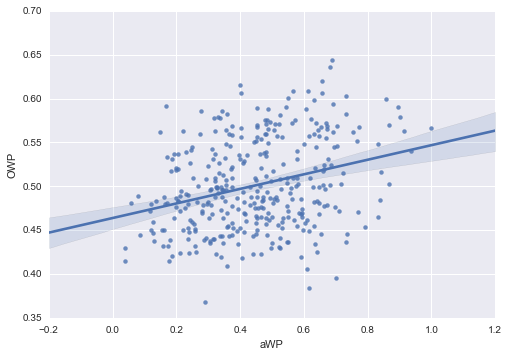

In [228]:
sns.regplot(x='aWP',y='OWP',data=t2015)

## now calculate the OOWP

In [230]:
c = a
c+=b
c

[1154,
 1212,
 1303,
 1115,
 1240,
 1363,
 1363,
 1307,
 1461,
 1424,
 1305,
 1307,
 1119,
 1160,
 1403,
 1413,
 1361,
 1305,
 1161,
 1307,
 1429,
 1361,
 1129,
 1424,
 1129,
 1161,
 1429,
 1201,
 1129]

In [233]:

def calc_opp_owin_pct(reg_season,teams,team_id,season_id=2015):
    lopponents,wopponents = get_list_of_opponents(reg_season[reg_season.Season==season_id],team_id)
    oowins = []
    #append these two lists
    opponents = lopponents
    opponents+=wopponents
    # loop through those who you beat
    for teamid in opponents:
        #print(teamid,t2015[t2015.Team_Id==teamid][['W','L','WP']])
        try:
            owp = teams[teams.Team_Id==teamid].OWP.values[0]
            oowins.append(owp)
        except IndexError:
            pass # skip over teams that aren't in that year (probably not Division 1)
    oowpct = np.mean(oowins)
    return(oowpct)

In [234]:
owp_tallies = []
for tid in t2015.Team_Id.tolist():
    
    
    oowpct = calc_opp_owin_pct(reg_season_comp,t2015,tid,2015)
    new_row = [tid,oowpct]
    owp_tallies.append(new_row)
    
    
t2015= t2015.merge(pd.DataFrame(owp_tallies,columns=['Team_Id','OOWP']),on='Team_Id')

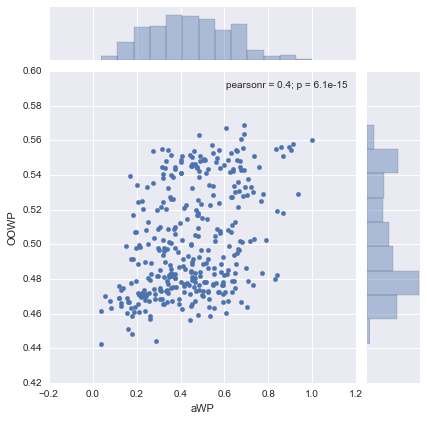

In [236]:
sns.jointplot(x='aWP',y='OOWP',data=t2015)

## calculate RPI

In [237]:
t2015.head()

,Team_Id,Team_Name,W,L,aW,aL,WP,aWP,OWP,OOWP
0,1101,Abilene Chr,7,21,5.8,24.2,0.250000,0.193333,0.463433,0.463791
1,1102,Air Force,12,17,8.8,19.4,0.413793,0.312057,0.542908,0.521552
2,1103,Akron,20,14,15.2,16.4,0.588235,0.481013,0.511210,0.509135
3,1104,Alabama,17,14,13.8,14.8,0.548387,0.482517,0.559389,0.542103
4,1105,Alabama A&M,8,20,8.8,22.0,0.285714,0.285714,0.438924,0.468210


In [238]:
def calc_rpi(wp,owp,oowp):
    fracs = [0.25,0.5,0.25] # allows you to adjust in one place
    rpi = fracs[0]*wp+fracs[1]*owp+fracs[2]*oowp
    return(rpi)

In [240]:
t2015['RPI'] = t2015[['aWP','OWP','OOWP']].apply(lambda x: calc_rpi(x[0],x[1],x[2]),axis=1)

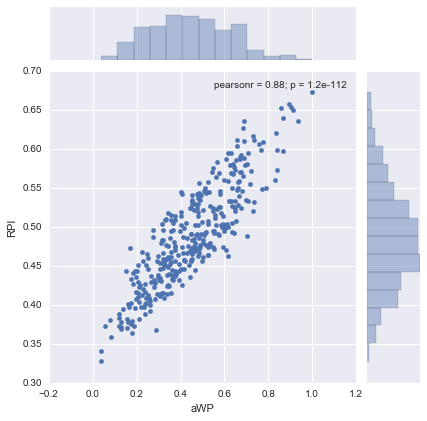

In [243]:
sns.jointplot(x='aWP',y='RPI',data=t2015)

In [244]:
t2015.sort_values(by='RPI',ascending=False)

,Team_Id,Team_Name,W,L,aW,aL,WP,aWP,OWP,OOWP,RPI
137,1246,Kentucky,34,0,30.4,0.0,1.000000,1.000000,0.566177,0.560135,0.673122
342,1458,Wisconsin,31,3,29.0,3.4,0.911765,0.895062,0.590018,0.556112,0.657802
324,1438,Virginia,29,3,27.4,3.0,0.906250,0.901316,0.579163,0.554456,0.653524
74,1181,Duke,29,4,26.6,4.4,0.878788,0.858065,0.599434,0.555935,0.653217
323,1437,Villanova,32,2,29.6,2.8,0.941176,0.913580,0.563264,0.558076,0.649546
10,1112,Arizona,31,3,27.4,4.2,0.911765,0.867089,0.569991,0.551069,0.639535
104,1211,Gonzaga,31,2,29.4,2.0,0.939394,0.936306,0.540037,0.529136,0.636379
133,1242,Kansas,26,8,22.0,10.0,0.764706,0.687500,0.644083,0.569124,0.636197
203,1314,North Carolina,24,11,22.8,10.6,0.685714,0.682635,0.636107,0.555598,0.627611
212,1323,Notre Dame,29,5,25.0,5.0,0.852941,0.833333,0.548008,0.554826,0.621044


In [245]:
tourney_seeds = pd.read_csv('TourneySeeds.csv')
tourney_seeds.head()

,Season,Seed,Team
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [246]:
tourney_teams_2015 = tourney_seeds[tourney_seeds['Season']==2015].Team.tolist()


In [259]:
t2015['tourney'] = 0
#t2015['tourney'].iloc[t2015[t2015.Team_Id.isin(tourney_teams_2015)]
#t2015.iloc[t2015.Team_Id.isin(tourney_teams_2015),'tourney']=1
t2015.loc[t2015[t2015.Team_Id.isin(tourney_teams_2015)].index.tolist(),'tourney']=1
t2015.tourney.value_counts()

0    281
1     68
Name: tourney, dtype: int64

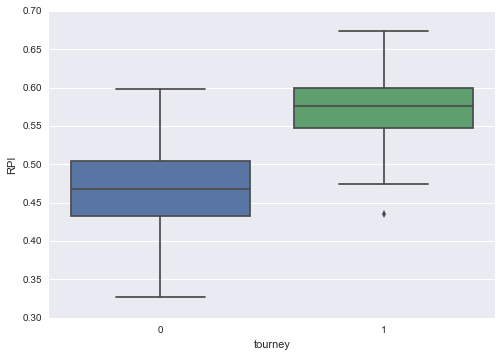

In [260]:
sns.boxplot(x='tourney',y='RPI',data=t2015)

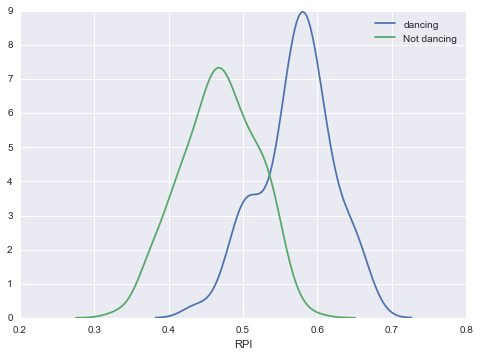

In [262]:
sns.distplot(t2015[t2015.tourney==1].RPI,hist=False,label='dancing')
sns.distplot(t2015[t2015.tourney==0].RPI,hist=False,label='Not dancing')

In [263]:
tourneyResults2015['wteam_RPI'] = tourneyResults2015['Wteam'].apply(lambda x: get_pct(x,t2015,'RPI'))#.head()
tourneyResults2015['lteam_RPI'] = tourneyResults2015['Lteam'].apply(lambda x: get_pct(x,t2015,'RPI'))#.head()

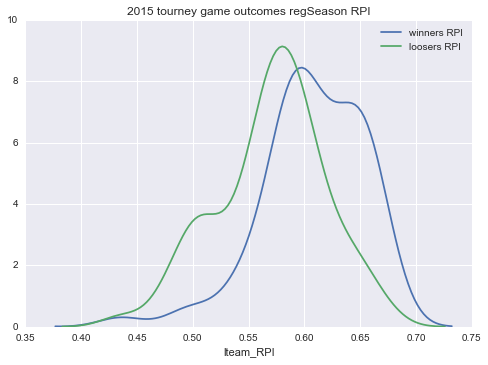

In [265]:
sns.distplot(tourneyResults2015.wteam_RPI,label='winners RPI',hist=False)
sns.distplot(tourneyResults2015.lteam_RPI,label='loosers RPI',hist=False)
plt.title('2015 tourney game outcomes regSeason RPI')
plt.legend()

In [267]:
tourneyResults2015.tail(10)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,wteamWP,lteamWP,wteam_aWP,lteam_aWP,wteam_RPI,lteam_RPI
1973,2015,144,1211,74,1417,62,N,0,0.939394,0.606061,0.936306,0.476821,0.636379,0.542846
1974,2015,144,1257,75,1301,65,N,0,0.750000,0.606061,0.732394,0.565517,0.611995,0.583055
1975,2015,144,1277,62,1328,58,N,0,0.676471,0.687500,0.656250,0.605263,0.604600,0.587389
1976,2015,145,1246,68,1323,66,N,0,1.000000,0.852941,1.000000,0.833333,0.673122,0.621044
1977,2015,145,1458,85,1112,78,N,0,0.911765,0.911765,0.895062,0.867089,0.657802,0.639535
1978,2015,146,1181,66,1211,52,N,0,0.878788,0.939394,0.858065,0.936306,0.653217,0.636379
1979,2015,146,1277,76,1257,70,N,1,0.676471,0.750000,0.656250,0.732394,0.604600,0.611995
1980,2015,152,1181,81,1277,61,N,0,0.878788,0.676471,0.858065,0.656250,0.653217,0.604600
1981,2015,152,1458,71,1246,64,N,0,0.911765,1.000000,0.895062,1.000000,0.657802,0.673122
1982,2015,154,1181,68,1458,63,N,0,0.878788,0.911765,0.858065,0.895062,0.653217,0.657802


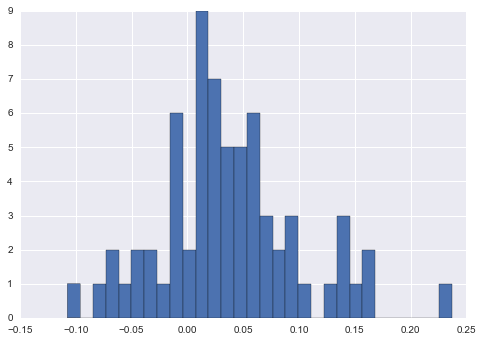

In [268]:
(tourneyResults2015['wteam_RPI']-tourneyResults2015['lteam_RPI']).hist(bins=30)

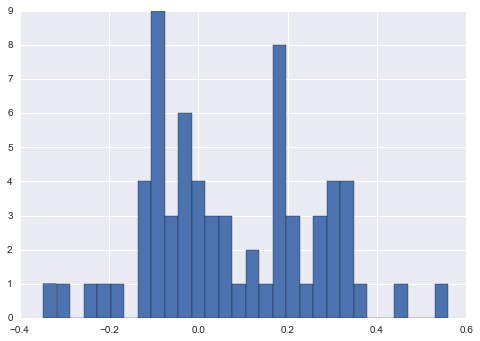

In [269]:
(tourneyResults2015['wteam_aWP']-tourneyResults2015['lteam_aWP']).hist(bins=30)

In [279]:
t2015.sort_values(by='RPI')

,Team_Id,Team_Name,W,L,aW,aL,WP,aWP,OWP,OOWP,RPI,tourney
90,1197,Florida A&M,2,27,1.2,30.2,0.068966,0.038217,0.414714,0.442521,0.327542,0
40,1146,Cent Arkansas,2,27,1.2,29.0,0.068966,0.039735,0.429757,0.461673,0.340230,0
142,1251,Liberty,4,24,2.4,26.0,0.142857,0.084507,0.444808,0.462945,0.359267,0
189,1299,NC A&T,7,23,5.8,27.0,0.233333,0.176829,0.415177,0.448463,0.363912,0
22,1126,Bethune-Cookman,9,21,9.0,22.2,0.300000,0.288462,0.368082,0.444251,0.367219,0
117,1226,Idaho St,5,23,3.8,25.8,0.178571,0.128378,0.437238,0.473860,0.369178,0
179,1288,Morgan St,7,24,5.4,28.8,0.225806,0.157895,0.431819,0.460051,0.370396,0
307,1420,UMBC,4,26,4.0,27.6,0.133333,0.126582,0.447041,0.464147,0.371203,0
285,1398,Tennessee St,3,26,1.8,29.6,0.103448,0.057325,0.480778,0.470324,0.372301,0
130,1239,Jacksonville,7,22,5.8,25.2,0.241379,0.187097,0.420770,0.460795,0.372358,0


In [285]:
len(t2015)

349

In [304]:
def rank_teams(teams,col='RPI'):
    teams[col+'_rank']=0
    nteams = len(teams)
    my_ranks = np.arange(nteams,0,-1)
    trank = teams[col].argsort()
    teams.loc[trank.values,col+'_rank']=my_ranks
    return teams

In [292]:
my_ranks = np.arange(len(t2015),0,-1)
#t2015.ix[trank.values]#['RPI_my_ranks

In [297]:
t2015['rpi_rank']=0

In [298]:
trank = t2015.RPI.argsort()
t2015.loc[trank.values]['rpi_rank'] = my_ranks
t2015.head()

,Team_Id,Team_Name,W,L,aW,aL,WP,aWP,OWP,OOWP,RPI,tourney,rpi_rank
0,1101,Abilene Chr,7,21,5.8,24.2,0.250000,0.193333,0.463433,0.463791,0.395998,0,0
1,1102,Air Force,12,17,8.8,19.4,0.413793,0.312057,0.542908,0.521552,0.479856,0,0
2,1103,Akron,20,14,15.2,16.4,0.588235,0.481013,0.511210,0.509135,0.503142,0,0
3,1104,Alabama,17,14,13.8,14.8,0.548387,0.482517,0.559389,0.542103,0.535850,0,0
4,1105,Alabama A&M,8,20,8.8,22.0,0.285714,0.285714,0.438924,0.468210,0.407943,0,0


In [302]:
t2015.loc[trank.values,'rpi_rank']=my_ranks

In [303]:
t2015

,Team_Id,Team_Name,W,L,aW,aL,WP,aWP,OWP,OOWP,RPI,tourney,rpi_rank
0,1101,Abilene Chr,7,21,5.8,24.2,0.250000,0.193333,0.463433,0.463791,0.395998,0,326
1,1102,Air Force,12,17,8.8,19.4,0.413793,0.312057,0.542908,0.521552,0.479856,0,179
2,1103,Akron,20,14,15.2,16.4,0.588235,0.481013,0.511210,0.509135,0.503142,0,134
3,1104,Alabama,17,14,13.8,14.8,0.548387,0.482517,0.559389,0.542103,0.535850,0,78
4,1105,Alabama A&M,8,20,8.8,22.0,0.285714,0.285714,0.438924,0.468210,0.407943,0,313
5,1106,Alabama St,17,10,17.4,10.8,0.629630,0.617021,0.384266,0.467346,0.463225,0,222
6,1107,Albany NY,24,8,24.0,8.8,0.750000,0.731707,0.436397,0.476341,0.520210,1,108
7,1108,Alcorn St,5,25,4.2,28.6,0.166667,0.128049,0.459140,0.466173,0.378125,0,336
8,1110,American Univ,17,16,16.6,20.0,0.515152,0.453552,0.494875,0.488415,0.482930,0,176
9,1111,Appalachian St,12,17,11.2,19.8,0.413793,0.361290,0.454369,0.482879,0.438227,0,268


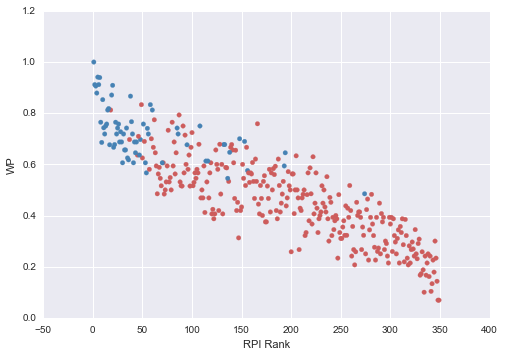

In [316]:
dcolors = {0:'indianred',1:'steelblue'}
plt.scatter(t2015.rpi_rank,t2015.WP,color=[dcolors[a] for a in t2015.tourney.tolist()])
plt.xlabel('RPI Rank')
plt.ylabel('WP')

## other features I might want:
* record in last 10 games
* rematches?
* margin of victory
* others from detailed season

In [325]:
t2015.head()

,Team_Id,Team_Name,W,L,aW,aL,WP,aWP,OWP,OOWP,RPI,tourney,rpi_rank
0,1101,Abilene Chr,7,21,5.8,24.2,0.250000,0.193333,0.463433,0.463791,0.395998,0,326
1,1102,Air Force,12,17,8.8,19.4,0.413793,0.312057,0.542908,0.521552,0.479856,0,179
2,1103,Akron,20,14,15.2,16.4,0.588235,0.481013,0.511210,0.509135,0.503142,0,134
3,1104,Alabama,17,14,13.8,14.8,0.548387,0.482517,0.559389,0.542103,0.535850,0,78
4,1105,Alabama A&M,8,20,8.8,22.0,0.285714,0.285714,0.438924,0.468210,0.407943,0,313


In [338]:
[name for name in t2015.Team_Name.tolist() if name.endswith('St')]

['Alabama St',
 'Alcorn St',
 'Appalachian St',
 'Arizona St',
 'Arkansas St',
 'Ball St',
 'Boise St',
 'Chicago St',
 'Cleveland St',
 'Colorado St',
 'Coppin St',
 'Delaware St',
 'Florida St',
 'Fresno St',
 'Georgia St',
 'Idaho St',
 'Illinois St',
 'Indiana St',
 'Iowa St',
 'Jackson St',
 'Jacksonville St',
 'Kansas St',
 'Long Beach St',
 'McNeese St',
 'Michigan St',
 'Mississippi St',
 'Missouri St',
 'Montana St',
 'Morehead St',
 'Morgan St',
 'MS Valley St',
 'Murray St',
 'N Dakota St',
 'New Mexico St',
 'Nicholls St',
 'Norfolk St',
 'Ohio St',
 'Oklahoma St',
 'Oregon St',
 'Penn St',
 'Portland St',
 'S Carolina St',
 'S Dakota St',
 'Sam Houston St',
 'San Diego St',
 'Savannah St',
 'SE Missouri St',
 'Tennessee St',
 'Texas St',
 'Utah St',
 'Washington St',
 'Weber St',
 'Wichita St',
 'Wright St',
 'Youngstown St']

In [339]:
def return_team_id(teams,team_name):
    ## some simple parsing things
    if team_name.endswith('.'):
        team_name=team_name[:-1] # reset
    try:
        tid = teams[teams.Team_Name==team_name].Team_Id.values[0]
    except IndexError:
        print("Sorry {0} not found in this listing".format(team_name))
        tid = 0
    return tid

In [340]:
return_team_id(t2015,'Michigan St.')

1277

In [353]:
def calc_ppg(reg_season,season,team_id,col='score'):
    #if col_attrib == 'score':
    wcol = 'W'+col
    lcol = 'L'+col
    
    wins = reg_season[(reg_season.Season==season)&(reg_season.Wteam==team_id)]
    loss = reg_season[(reg_season.Season==season)&(reg_season.Lteam==team_id)]
    win_sum = wins[wcol].sum()
    win_mean = wins[wcol].mean()
    loss_sum = loss[lcol].sum()
    loss_mean = loss[lcol].mean()
    
    opp_sum = wins[lcol].sum()+loss[wcol].sum()
    ngames = len(wins)+len(loss)
    #if col =='score':
    total_pts=win_sum+loss_sum
    ppg = total_pts/ngames
    opp_ppg = opp_sum/ngames
    return(ppg,opp_ppg)
    
    
    

In [354]:
#reg_season_comp[(reg_season_comp.Season==2016)*reg_season_comp.Wteam==1277].plot(x='Wscore',y='Lscore',kind='scatter')#.mean()
#reg_season_comp[(reg_season_comp.Season==2016)*reg_season_comp.Lteam==1277].plot(x='Wscore',y='Lscore',kind='scatter',color='indianred')#.mean()

In [341]:
reg_season_dtl[(reg_season_dtl.Season==2016)&(reg_season_dtl.Wteam==1277)]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
65924,2016,11,1277,82,1194,55,H,0,30,62,...,20,10,14,5,21,9,10,5,3,25
66133,2016,15,1277,79,1242,73,N,0,28,60,...,15,24,30,12,23,12,6,7,1,18
66257,2016,18,1277,92,1115,46,H,0,33,57,...,20,6,6,3,11,7,17,6,2,22
66432,2016,21,1277,89,1185,65,H,0,31,64,...,19,14,25,10,19,9,4,7,2,21
66579,2016,24,1277,99,1130,68,N,0,37,59,...,24,8,15,2,18,16,7,3,0,17


In [355]:
## assign the ppg values
ppg_tallies = []
for tid in t2015.Team_Id.tolist():
    
    
    ppgvals = calc_ppg(reg_season_comp,2015,tid)
    new_row = [tid,ppgvals[0],ppgvals[1]]
    ppg_tallies.append(new_row)
    
    
t2015= t2015.merge(pd.DataFrame(ppg_tallies,columns=['Team_Id','PPG','OppPPG']),on='Team_Id')

In [356]:
t2015.head()

,Team_Id,Team_Name,W,L,aW,aL,WP,aWP,OWP,OOWP,RPI,tourney,rpi_rank,PPG,OppPPG
0,1101,Abilene Chr,7,21,5.8,24.2,0.250000,0.193333,0.463433,0.463791,0.395998,0,326,61.000000,71.857143
1,1102,Air Force,12,17,8.8,19.4,0.413793,0.312057,0.542908,0.521552,0.479856,0,179,64.724138,65.862069
2,1103,Akron,20,14,15.2,16.4,0.588235,0.481013,0.511210,0.509135,0.503142,0,134,67.352941,63.235294
3,1104,Alabama,17,14,13.8,14.8,0.548387,0.482517,0.559389,0.542103,0.535850,0,78,66.645161,64.516129
4,1105,Alabama A&M,8,20,8.8,22.0,0.285714,0.285714,0.438924,0.468210,0.407943,0,313,61.285714,68.714286


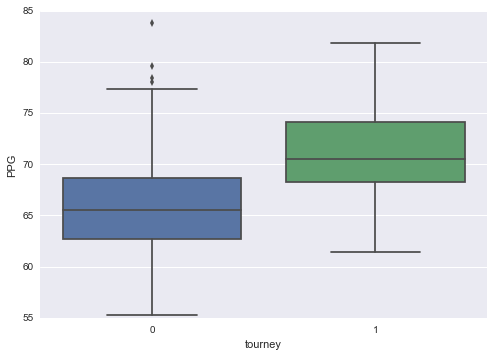

In [358]:
sns.boxplot(x='tourney',y='PPG',data=t2015)

# calculate scoring margin

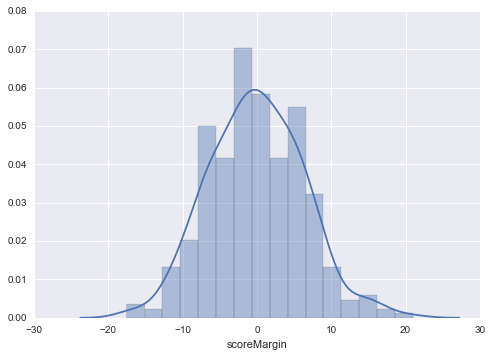

In [359]:
t2015['scoreMargin']=t2015['PPG']-t2015['OppPPG']
sns.distplot(t2015.scoreMargin)

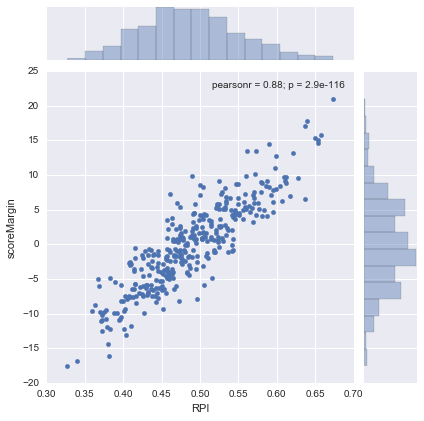

In [360]:
sns.jointplot(x='RPI',y='scoreMargin',data=t2015)

In [366]:
t2015.sort_values(by='PPG',ascending=False)

,Team_Id,Team_Name,W,L,aW,aL,WP,aWP,OWP,OOWP,RPI,tourney,rpi_rank,PPG,OppPPG,scoreMargin
211,1322,Northwestern LA,15,12,14.2,14.0,0.555556,0.503546,0.480421,0.470035,0.483606,0,173,83.814815,83.888889,-0.074074
34,1140,BYU,23,9,21.4,9.0,0.718750,0.703947,0.546207,0.528462,0.581206,1,31,81.843750,72.937500,8.906250
74,1181,Duke,29,4,26.6,4.4,0.878788,0.858065,0.599434,0.555935,0.653217,1,4,80.606061,65.575758,15.030303
124,1233,Iona,26,8,24.8,10.8,0.764706,0.696629,0.476640,0.486338,0.534062,0,80,79.617647,72.823529,6.794118
79,1186,E Washington,23,8,23.4,9.6,0.741935,0.709091,0.471649,0.478903,0.532823,1,85,79.354839,74.258065,5.096774
65,1172,Davidson,23,7,21.4,8.2,0.766667,0.722973,0.514623,0.533285,0.571376,1,39,79.166667,69.066667,10.100000
259,1372,SF Austin,26,4,25.2,4.8,0.866667,0.840000,0.484821,0.482272,0.572978,1,38,78.966667,65.500000,13.466667
212,1323,Notre Dame,29,5,25.0,5.0,0.852941,0.833333,0.548008,0.554826,0.621044,1,10,78.823529,65.647059,13.176471
111,1220,Hofstra,20,13,20.8,13.0,0.606061,0.615385,0.448875,0.484891,0.499506,0,142,78.393939,69.787879,8.606061
126,1235,Iowa St,25,8,21.4,9.6,0.757576,0.690323,0.593757,0.563968,0.610451,1,14,78.363636,69.272727,9.090909


## add this to the tourney results 2015

In [361]:
tourneyResults2015['w_scoreMarg'] = tourneyResults2015['Wteam'].apply(lambda x: get_pct(x,t2015,'scoreMargin'))#.head()
tourneyResults2015['l_scoreMarg'] = tourneyResults2015['Lteam'].apply(lambda x: get_pct(x,t2015,'scoreMargin'))#.head()

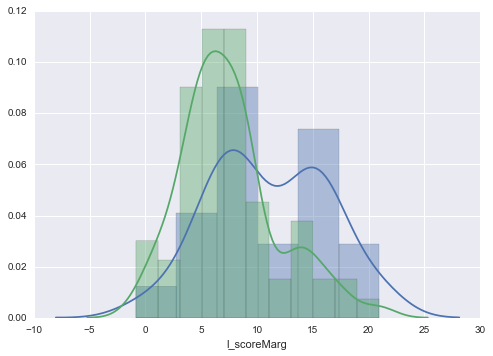

In [362]:
sns.distplot(tourneyResults2015.w_scoreMarg,label='winners')
sns.distplot(tourneyResults2015.l_scoreMarg,label='loosers')

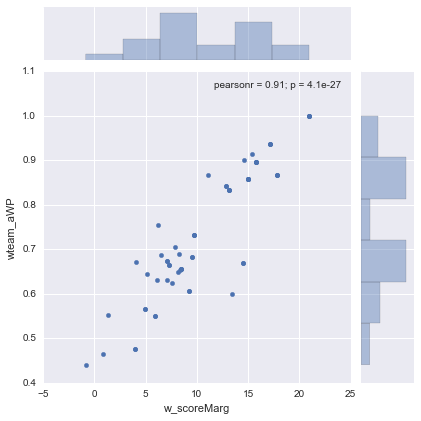

In [365]:
sns.jointplot(tourneyResults2015.w_scoreMarg,tourneyResults2015.wteam_aWP)

## Question does performance against other teams in the tourney correlate with success?

## need to generate some attributes for different years and the train on them